In [5]:
import pickle
import calendar
import os
import regex as re
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil import parser
from itertools import compress

from sklearn.linear_model import LinearRegression, RidgeCV, Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.utils import shuffle

from xgboost import XGBRegressor, DMatrix

import warnings

warnings.filterwarnings("ignore")

sns.set(rc={"figure.figsize": (11.7, 8.27)})

In [6]:
dat = pd.read_csv('../Data/dat_features.csv')

In [9]:
unseen = dat[(dat.Impressions.eq(0.0)) & (dat.GRP.eq(0.0)) | (dat.active_flag.eq(1))]
training = dat[dat.Impressions > 0.0]

In [31]:
labels = [
        'Q119', 'Q219',
        'Q319', 'Q419',
        'BP', 'DC', 'DE', 'DP',
        'GD', 'GX', 'PL', 'PM',
        'PN', 'PT', 'SR', 'SV',
        'TN', 'VE',
        "Length",
        "Spot_Cost",
        "Cable",
        "DirecTV",
        "Dish_Network",
        "National_Network",
        "Over-the-top_content",
        'Q1', 'Q2', 'Q3', 'Q4',
        'bin_1', 'bin_2',
        'bin_3', 'bin_4', 'bin_5',
        'Daytime', 'Early_Fringe',
        'Late_Fringe', 'Late_Night',
        'Morning', 'Overnight',
        'Primetime',
        'midnight', 'one_am', 'two_am', 'three_am', 'four_am', 'five_am',
        'six_am', 'seven_am', 'eight_am', 'nine_am', 'ten_am', 'eleven_am',
        'noon', 'one_pm', 'two_pm', 'three_pm', 'four_pm', 'five_pm', 'six_pm',
        'seven_pm', 'eight_pm', 'nine_pm', 'ten_pm', 'eleven_pm'
    ]

X = training.loc[:,labels]
y = training.loc[:, "Impressions"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Base Linear Model

In [32]:
lr = sm.OLS(y_train, X_train).fit()

lr_preds = lr.predict(X_test)

lr_mse = MSE(y_test, lr_preds)
print(lr_mse)
print(np.sqrt(lr_mse))

1154.8432281875432
33.982984392009236


In [13]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Impressions   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     805.0
Date:                Wed, 08 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:43:28   Log-Likelihood:            -2.7562e+05
No. Observations:               55638   AIC:                         5.513e+05
Df Residuals:                   55585   BIC:                         5.518e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Q119                    61.5621      2.117     29.076      0.000      57.412      65.712
Q219                    26.3359      1.059     24.869      0.000      24.260      28.412
Q319                    38.0697      3.467     10.981      0.000      31.275      44.865
Q419                    27.7134      2.919      9.496      0.000      21.993      33.434
BP                       4.6268      1.287      3.595      0.000       2.104       7.149
DC                       2.6730      2.182      1.225      0.221      -1.603       6.949
DE                       9.3984      2.654      3.542      0.000       4.197      14.599
DP                      19.1555      0.953     20.098      0.000      17.287      21.024
GD                       7.9666      0.745     10.687      0.000       6.505       9.428
GX                      13.4893      1.012     13.330      0.000      11.506      15.473
PL                      10.4092      1.970      5.284      0.000       6.548      14.270
PM                      18.8666      0.975     19.344      0.000      16.955      20.778
PN                      13.4510      2.122      6.338      0.000       9.291      17.611
PT                      10.3307      0.772     13.389      0.000       8.818      11.843
SR                       4.9801      1.326      3.755      0.000       2.381       7.580
SV                      29.5064      2.748     10.738      0.000      24.120      34.892
TN                       1.4240      2.423      0.588      0.557      -3.325       6.173
VE                       7.4036      1.742      4.250      0.000       3.989      10.818
Length                  -0.9225      0.088    -10.429      0.000      -1.096      -0.749
Spot_Cost                0.0953      0.001    146.448      0.000       0.094       0.097
Cable                  -42.4680      2.250    -18.879      0.000     -46.877     -38.059
DirecTV                217.3735      9.559     22.740      0.000     198.638     236.109
Dish_Network           -55.0689      2.273    -24.226      0.000     -59.524     -50.613
National_Network        33.8445      2.319     14.597      0.000      29.300      38.389
Over-the-top_content -2.132e-13   9.77e-15    -21.820      0.000   -2.32e-13   -1.94e-13
Q1                     -14.5398      0.764    -19.032      0.000     -16.037     -13.042
Q2                      26.3359      1.059     24.869      0.000      24.260      28.412
Q3                      14.4280      4.695      3.073      0.002       5.226      23.630
Q4                      19.6918      4.059      4.851      0.000      11.736      27.648
bin_1                  -12.9967      3.077     -4.223      0.000     -19.028      -6.965
bin_2                    5.1723      1.010      5.121      0.000       3.193       7.152
bin_3                    7.1010      1.008      7.045    

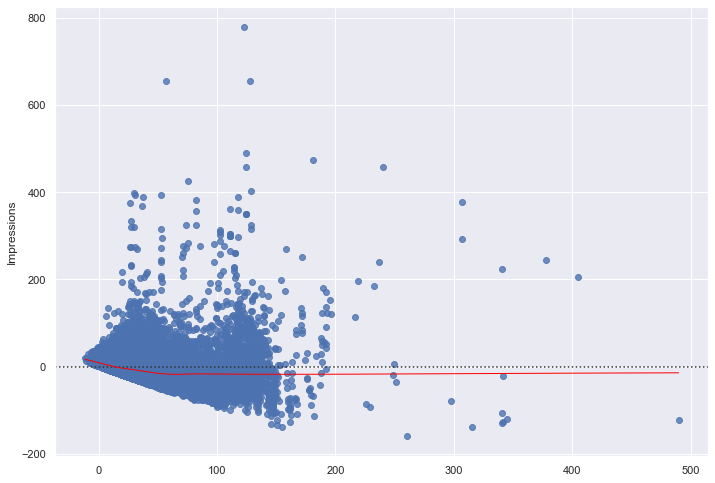

In [14]:
sns.residplot(
    lr_preds,
    y_test,
    lowess=True,
    line_kws={"color": "red", "lw": 1, "alpha": 1},
)

Text(0.5, 1.0, 'Normal Q-Q Plot')

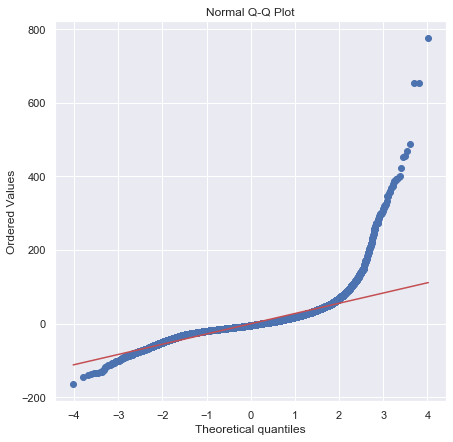

In [15]:
residuals = y_test - lr_preds
residuals

plt.figure(figsize=(7, 7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

## Ridge CV Tuning

In [16]:
rcv = RidgeCV(alphas=[1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10], normalize=True)
rcv.fit(X_train, y_train)
rcv.score(X_train, y_train)

0.4295730689612034

In [17]:
rcv.get_params()

{'alphas': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
        1.e-02, 1.e-01, 1.e+00, 1.e+01]),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': True,
 'scoring': None,
 'store_cv_values': False}

In [18]:
preds_rcv = rcv.predict(X_test)

## Ridge regression with SelectFromModel

In [19]:
mse_list = []
rmse_list = []
score_list = []
a_list = []
for a in [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]:
    ridge = Ridge(alpha=a, normalize=True, solver='sag', random_state=1234)
    
    ridge.fit(X_train, y_train)
    preds = ridge.predict(X_test)
    score_list.append(ridge.score(X_test, y_test))
    mse_list.append(MSE(y_test, preds))
    rmse_list.append(np.sqrt(MSE(y_test, preds)))
    a_list.append(a)

In [20]:
ridge_results = pd.DataFrame(list(zip(a_list, score_list, mse_list, rmse_list)), 
                             columns = ['Alpha', 'R2', 'MSE', 'RMSE'])

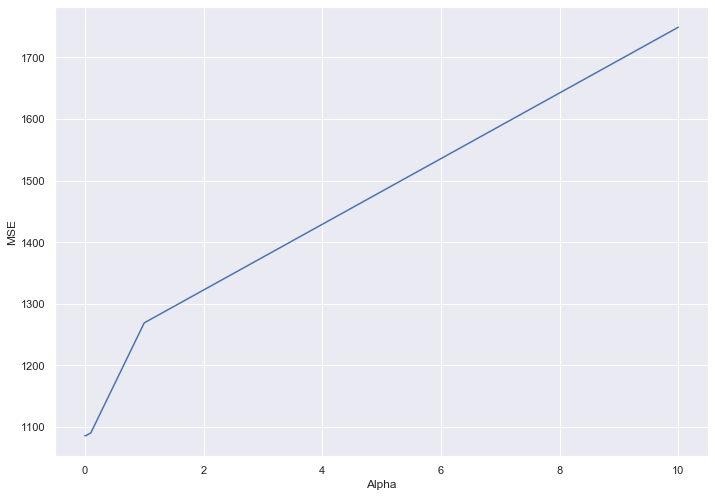

In [21]:
line = sns.lineplot('Alpha', 'MSE', data=ridge_results)
plt.show()

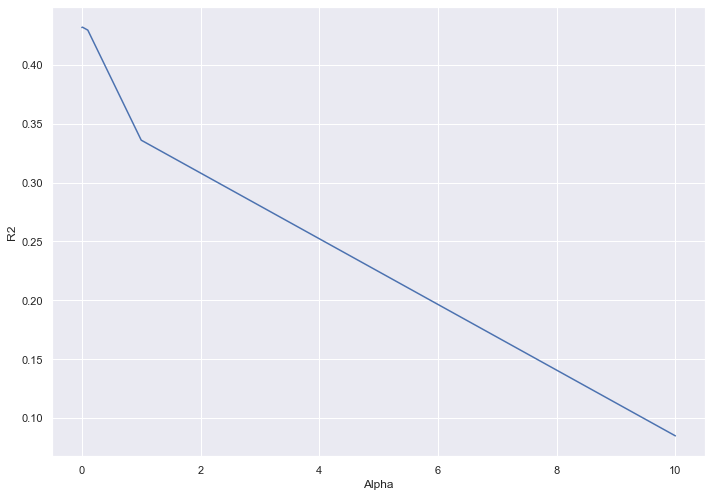

In [22]:
line = sns.lineplot('Alpha', 'R2', data=ridge_results)
plt.show()

In [23]:
rcv_list = [rcv.alpha_, rcv.score(X_test, y_test), MSE(y_test, rcv.predict(X_test)), np.sqrt(MSE(y_test, rcv.predict(X_test)))]
rcv_results = pd.DataFrame(rcv_list).transpose()
rcv_results

,0,1,2,3
0,0.0001,0.431822,1085.84559,32.952171


In [24]:
ridge_results[ridge_results.MSE == ridge_results.MSE.min()]

,Alpha,R2,MSE,RMSE
8,0.01,0.432153,1085.21407,32.942587


In [25]:
selector_ridge = SelectFromModel(estimator=Ridge(alpha=1.000000e-10, normalize=True)).fit(X_train, y_train)
selector_ridge.get_support()

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False])

In [26]:
selected_labels = list(compress(labels, list(selector_ridge.get_support())))
selected_labels

X_adj = training.loc[:,selected_labels]
X_train_adj, X_test_adj, y_train_adj, y_test_adj = train_test_split(X_adj, y, test_size=0.25)

#### Ridge Regression with selected predictors

In [27]:
ridge_adjusted = Ridge(alpha=1.000000e-10, normalize=True)
ridge_adjusted.fit(X_train_adj, y_train_adj)
preds = ridge_adjusted.predict(X_test_adj)

print(ridge_adjusted.score(X_test_adj, y_test_adj))
print(MSE(y_test_adj, preds))

0.19462121195850157
1659.3270842560132


In [28]:
print(np.sqrt(MSE(y_test_adj, preds)))

40.73483870418555


## Ridge Regression with Scaling

In [33]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X)
X_scale = scaler_x.transform(X)

scaler_y.fit(y.values.reshape(1, -1))
y_scale = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.30)

In [38]:
mse_list = []
rmse_list = []
score_list = []
a_list = []
for a in [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]:
    ridge = Ridge(alpha=a, solver='sag', random_state=1234)
    
    ridge.fit(X_train, y_train)
    preds = scaler_y.inverse_transform(ridge.predict(X_test))
    score_list.append(ridge.score(X_test, y_test))
    mse_list.append(MSE(scaler_y.inverse_transform(y_test), preds))
    rmse_list.append(np.sqrt(MSE(scaler_y.inverse_transform(y_test), preds)))
    a_list.append(a)

In [39]:
ridge_results = pd.DataFrame(list(zip(a_list, score_list, mse_list, rmse_list)), 
                             columns = ['Alpha', 'R2', 'MSE', 'RMSE'])
ridge_results[ridge_results.MSE == ridge_results.MSE.min()]

,Alpha,R2,MSE,RMSE
9,0.1,0.430091,1144.017835,33.823333
